In [20]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

tickers = ["AAPL", "AMZN", "META", "TSLA", "GOOGL"]

# auto_adjust=True returns OHLCV already adjusted for splits/dividends
data = yf.download(tickers, period="3y", auto_adjust=True)

# now 'Close' is the adjusted close
prices = data["Close"]          # columns: AAPL, AMZN, ...
simple_ret = prices.pct_change().dropna()
aapl_ret = simple_ret["AAPL"]
aapl_ret.head()


[*********************100%***********************]  5 of 5 completed


Date
2022-10-25    0.019338
2022-10-26   -0.019627
2022-10-27   -0.030465
2022-10-28    0.075552
2022-10-31   -0.015410
Name: AAPL, dtype: float64

In [21]:
print("nlevels:", getattr(prices.columns, "nlevels", 1))
print(prices.columns[:5])


nlevels: 1
Index(['AAPL', 'AMZN', 'GOOGL', 'META', 'TSLA'], dtype='object', name='Ticker')


In [22]:
prices.head(), prices.columns

(Ticker            AAPL        AMZN       GOOGL        META        TSLA
 Date                                                                  
 2022-10-24  147.127502  119.820000  101.817749  128.925232  211.250000
 2022-10-25  149.972626  120.599998  103.764328  136.667465  222.419998
 2022-10-26  147.029099  115.660004   94.279739  129.024628  224.639999
 2022-10-27  142.549805  110.959999   91.588295   97.339935  225.089996
 2022-10-28  153.319748  103.410004   95.630432   98.592194  228.520004,
 Index(['AAPL', 'AMZN', 'GOOGL', 'META', 'TSLA'], dtype='object', name='Ticker'))

In [23]:
# Compute daily returns 
simple_ret = prices.pct_change().dropna()
log_ret = np.log(prices).diff().dropna()

In [24]:
# Access AAPL daily returns

aapl_ret = simple_ret["AAPL"]
aapl_ret.head()

Date
2022-10-25    0.019338
2022-10-26   -0.019627
2022-10-27   -0.030465
2022-10-28    0.075552
2022-10-31   -0.015410
Name: AAPL, dtype: float64

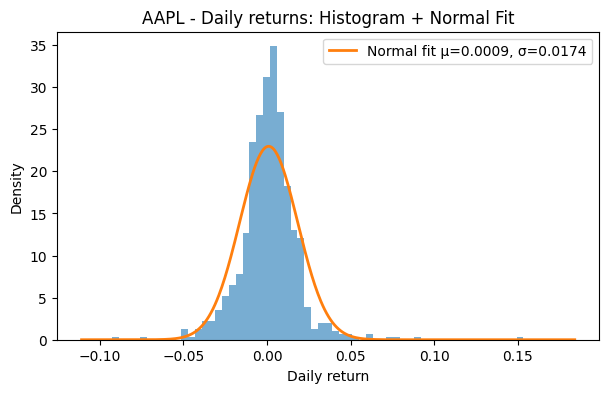

In [25]:
# Histogram for AAPL daily returns (density=True normalizes area to 1)
plt.figure(figsize=(7,4))
plt.hist(aapl_ret, bins=60, density=True, alpha=0.6)
plt.title("AAPL - Daily returns: Histogram + Normal Fit")
plt.xlabel("Daily return")
plt.ylabel("Density")

mu, sigma = aapl_ret.mean(), aapl_ret.std()
x = np.linspace(aapl_ret.min()*1.2, aapl_ret.max()*1.2, 500)
plt.plot(x, norm.pdf(x, mu, sigma), linewidth=2, label=f"Normal fit μ={mu:.4f}, σ={sigma:.4f}")
# What is norm???? 
plt.legend()
plt.show()

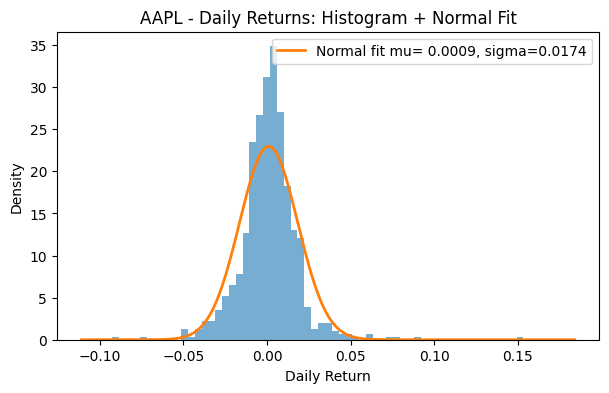

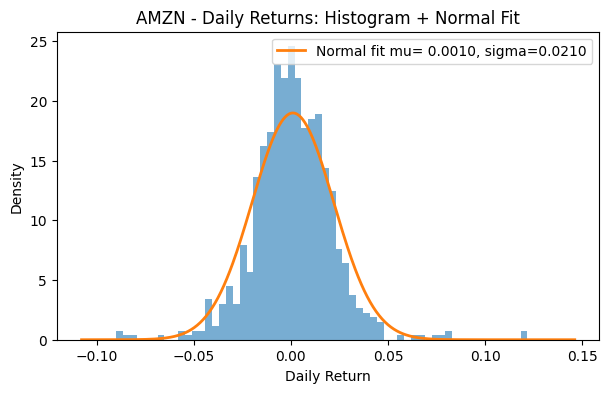

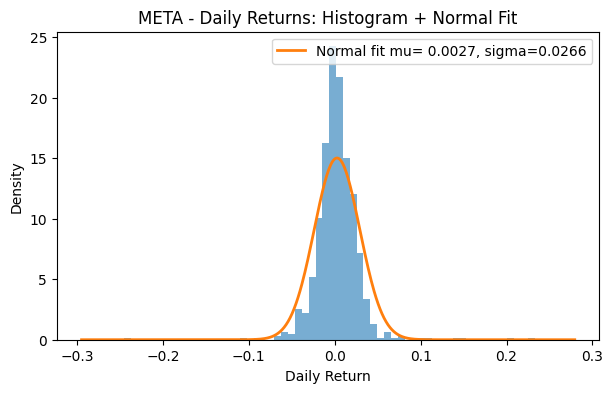

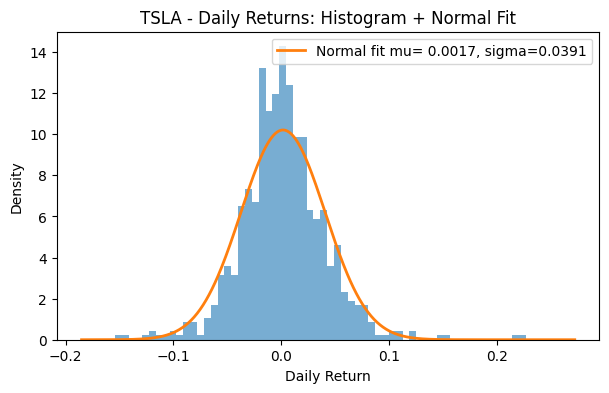

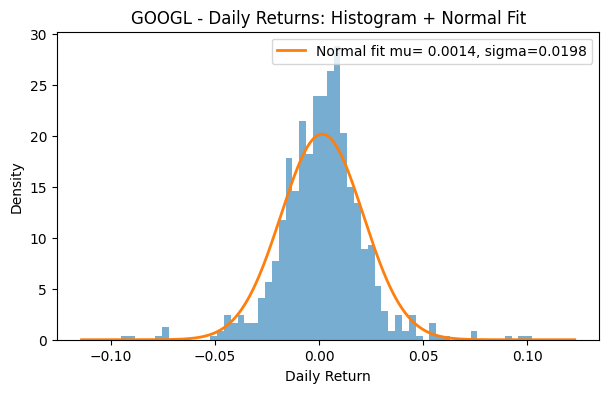

In [26]:
# Loop the plot for all tickers (quick scan)

for t in tickers:
    r = simple_ret[t].dropna()
    mu, sigma = r.mean(), r.std()
    x = np.linspace(r.min()*1.2, r.max()*1.2, 500)

    plt.figure(figsize=(7,4))
    plt.hist(r, bins=60, density=True, alpha=0.6)
    plt.plot(x, norm.pdf(x, mu, sigma), linewidth=2, label=f"Normal fit mu={mu: .4f}, sigma={sigma:.4f}")
    plt.title(f"{t} - Daily Returns: Histogram + Normal Fit")
    plt.xlabel("Daily Return"); plt.ylabel("Density")
    plt.legend()
    plt.show()

In [29]:
# Stats table 
from scipy.stats import skew, kurtosis

def describe_returns(df):
    desc = df.describe().T[["mean", "50%", "std", "min", "max"]]
    desc.rename(columns={"50%": "median"}, inplace=True)
    desc["skew"] = df.skew()
    desc["kurtosis"] = df.kurtosis()
    return desc
    
def tidy_table(df, name="simple"):
    tbl = describe_returns(df)
    # make percentages more readable
    pct_cols = ["mean", "median", "std", "min", "max"]
    tbl[pct_cols] = (tbl[pct_cols]*100).round(3)
    tbl[["skew", "kurtosis"]] = tbl[["skew", "kurtosis"]].round(3)
    tbl.index.name = f"{name}_returns"
    return tbl

tidy_simple = tidy_table(simple_ret, "simple")
tidy_log = tidy_table(log_ret, "log")
tidy_simple, tidy_log


(                 mean  median    std     min     max   skew  kurtosis
 simple_returns                                                       
 AAPL            0.092   0.123  1.737  -9.246  15.329  0.889    10.885
 AMZN            0.104   0.042  2.100  -8.979  12.178  0.301     4.539
 GOOGL           0.140   0.212  1.977  -9.509  10.224  0.026     4.327
 META            0.267   0.167  2.656 -24.557  23.282  0.741    23.874
 TSLA            0.174   0.100  3.910 -15.426  22.690  0.446     3.616,
               mean  median    std     min     max   skew  kurtosis
 log_returns                                                       
 AAPL         0.077   0.123  1.725  -9.701  14.262  0.596     9.274
 AMZN         0.082   0.042  2.094  -9.408  11.492  0.104     4.222
 GOOGL        0.120   0.212  1.976  -9.992   9.735 -0.160     4.345
 META         0.232   0.167  2.646 -28.179  20.931 -0.333    27.177
 TSLA         0.099   0.100  3.885 -16.755  20.449  0.147     3.017)

In [30]:
simple_ret

Ticker,AAPL,AMZN,GOOGL,META,TSLA
Date,,,,,
2022-10-25,0.019338,0.006510,0.019118,0.060052,0.052876
2022-10-26,-0.019627,-0.040962,-0.091405,-0.055923,0.009981
2022-10-27,-0.030465,-0.040636,-0.028547,-0.245571,0.002003
2022-10-28,0.075552,-0.068042,0.044134,0.012865,0.015238
2022-10-31,-0.015410,-0.009380,-0.018486,-0.060887,-0.004289
...,...,...,...,...,...
2025-10-15,0.006336,-0.003789,0.022734,0.012559,0.013769
2025-10-16,-0.007580,-0.005103,0.001713,-0.007637,-0.014708
2025-10-17,0.019559,-0.006668,0.007317,0.006811,0.024630
